# Notebook 1 - Working with tabulated data 
----------------------------------------------------------------

## Table of Content <a id='toc' />

1. **[Reading tabulated data](#1)**  
    1.1 [Reading data from a file](#11)  
    1.2 [Assigning row names (index values)](#12)  
    1.3 [Reading other tabulated file formats](#13)  
    <br>

2. **[Data manipulation: selecting rows and columns](#2)**  
    2.1 [Accessing and setting row and column names](#21)  
    2.2 [Accessing and editing columns by name](#22)  
    2.3 [Deleting columns](#23)  
    2.4 [Data types](#24)  
    <br>



## Introduction

The basis of any statistical analysis is the underlying data, and very often data are stored in **tabular format**:
 * Each **line** corresponds to an observation (individual, sample, ... ).
 * Each **column** correspond to a measured variable (height, sex, gene expression, ... ).

In python, the most popular module to read and manipulate tabulated data is certainly **[pandas](https://pandas.pydata.org)**, a "high-level" module designed for data manipulation and exploratory analysis. A great strength of pandas is its **DataFrame** object which emulates many of the convenient behaviors and syntax of its eponym counterpart in the **R** language.

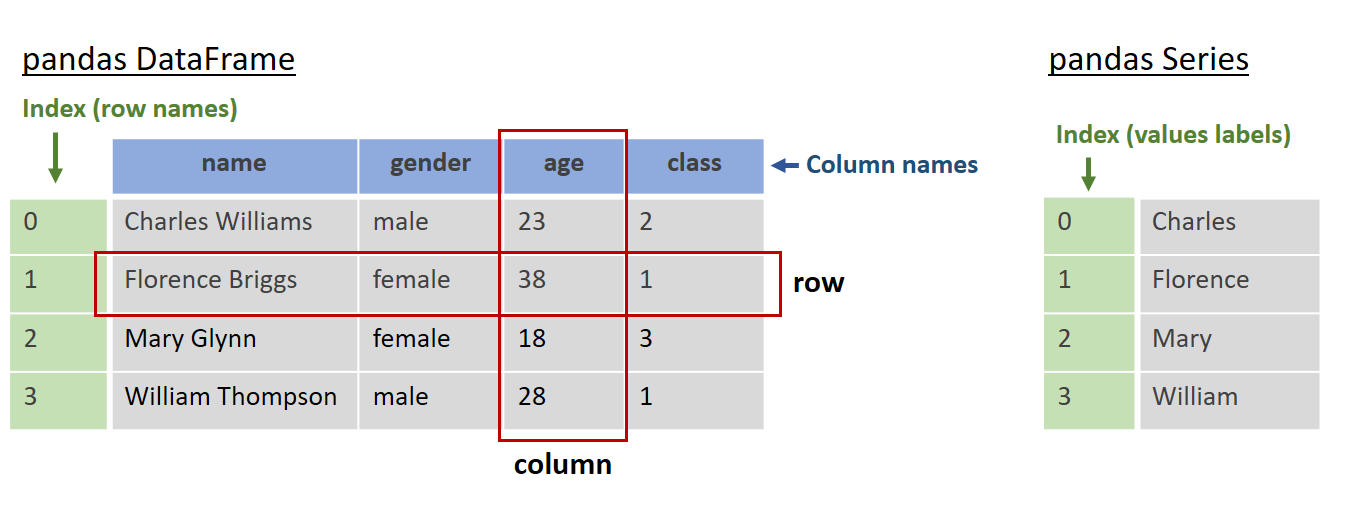

<br>

To graphically represent data, we will rely on the **[seaborn](https://seaborn.pydata.org)** library.
Seaborn is designed to work hand-in-hand with pandas DataFrame to produce **efficient data representation** from fairly simple commands. The seaborn official website proposes [very good tutorials](https://seaborn.pydata.org/tutorial.html) as well as a [gallery](https://seaborn.pydata.org/examples/index.html) with associated code to get you started quickly.

<br>

### Loading the pandas and seaborn modules

By convention, pandas is imported as **`pd`** and seaborn as **`sns`**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modules loaded successfully!")

> 🌈 **Note:** if you are missing some of the above modules, you should install them.
>
>    * Installation with **conda**: `conda install -c conda-forge pandas matplotlib seaborn numpy`
>    * Installation with **pip**: `pip install --user pandas matplotlib seaborn numpy` 

> ✨ **Tip:** if you want to know the versions of your modules, you can:
>
> * Run the command `pip list` in your terminal (or `uv pip list` if using `uv` as package manager).  
>   To run a shell command directly from Jupyter, you can prefix is with `!`, as in `!pip list` (only works on Linux/MacOS).
>
> * Print them in a Python session:
>
>    ```python
>    # Print module versions.
>    import sys
>    import matplotlib
>    print("Python version:", sys.version)
>    for module in (pd, np, sns, matplotlib):
>        print(f"{module.__name__} {module.__version__}")
>    ```

<br>

Making the plotted labels a bit bigger for presentation with a projector... you do **not need to run this cell**.

In [ ]:
import matplotlib as mpl

font = {"family": "DejaVu Sans",
        "weight": "bold",
        "size"  : 16}

mpl.rc("font", **font)

<br>

### Alternatives to Pandas

To this day, the **Pandas** library is certainly the the most popular and most used library for manipulation of tabular data in Python, which is why we present it in this course.

However, there exists alternative, and in particular the [polars](https://pola.rs) library, which has been developed relatively recently and can be a good alternative when processing extremely large datasets.

Here are some links comparisons between the pandas and the polars library:

* Performance comparison:
    * https://www.datacamp.com/tutorial/high-performance-data-manipulation-in-python-pandas2-vs-polars 
    * https://medium.com/cuenex/pandas-2-0-vs-polars-the-ultimate-battle-a378eb75d6d1 
* Usability comparison
    * https://www.confessionsofadataguy.com/replacing-pandas-with-polars-a-practical-guide 



<br>
<br>

[Back to ToC](#toc)

# 1. Reading tabulated data <a id='1' />
----------------------------------------

In most cases, the data we want to work with is stored in a file on disk. The very first step is therefore to **load the data as a DataFrame**.

## 1.1 Reading data from a file <a id='11' />

The two basic Pandas commands to read **tabulated text files** are `read_table()` and `read_csv()`. They only differ in the default expected field **separator** value.

* `pd.read_table(<file path and name>, sep="\t")`: reads **tab-separated (TSV) files** by default.
* `pd.read_csv(<file path and name>, sep=",")`: reads **comma-separated (CSV) files** by default.

Their only required argument is the name (and path, if needed) of the file to read.

> 🦉 **Reminder:** By default, Python is searching for files in your current working directory. If the file you wish to load
> is not located there, you need to specify its path, either absolute or relative to the working directory.

<br>

Both function can read any type of **tabulated text files** by passing the correct value to the optional **`sep`** argument.

Here are some useful optional arguments for `read_table()` and `read_csv()`:
* **`sep`**: the separator between columns/fields in the file. The default value for this argument is:
  *  `"\t"` (tab) for `read_table()`,
  *  `,` (comma) for `read_csv()`.
* **`header`**: the **row number to use as the column names** (all rows above it are skipped).
  By default the first line of the file is used as header.
  Use **`header=None` if the file does not contain column names**.
* **`names`**: sequence of strings to use as **column names**. The length of the sequence should match the
  of columns in the file.
* **`index_col`**: column number or name to use as index (**row names**) of the DataFrame.

<br>

**Example:**

Let's try to load the file `data/titanic.csv`. As its name suggest, this file contains the popular dataset of the ill-fated [Titanic](https://en.wikipedia.org/wiki/Titanic) passengers, traveling from England to New York in April 1912.  
* The file `titanic.csv` is located in a `data/` subdirectory of our current working directory. We must
  therefore pass `data/titanic.csv` as argument to `pd.read_table()`.
* As indicated by its `.csv` file name extension, the data is in **C**omma-**S**eparated **V**alues format.

> 🗽 **Note:** the dataset we are using here is *not* the complete list of people that were on the Titanic.
> There were around 2240 people on board - precise numbers are disputed due to duplicate entries, people
> traveling under pseudonyms, last minute cancellations and last minute replacements of people.

In [ ]:
df = pd.read_csv("data/titanic.csv")
df

<br>

It is often practical to **display only a small part of a DataFrame**. This can be done with the **`.head()`** and **`.tail()`** methods of `DataFrame`.

* By default, `head()`/`tail()` returns the **first/last 5 rows** of a DataFrame.
* To return a different number of rows, a value can be passed: e.g. `head(10)` returns the first 10 rows.

In [ ]:
df.head()  # By default, head() returns the first 5 rows of a DataFrame.

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 1

* Read the file `data/titanic.csv` again (the same file we loaded just before), but this time using the function **`pd.read_table()`**.
* Display the first 5 lines of the file.
* Display the last 3 lines of the file.

If needed, you can display the help for the `read_table()` function with `help(pd.read_table)`, or use the [online help](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).

</div>


<br>
<br>
<br>

<center><b>Spoiler alert</b>: do not scroll or be spoiled!</center>

-----

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

As you have just seen, **`pd.read_table()`** expects (by default) the input data to be **tab-delimited**.

This is not the case of `titanic.csv`, which instead contains **comma-delimited** values (`.csv` stands for "**C**omma-**S**eparated **V**alues") - and therefore each line of the file was treated as a single field (column), creating a DataFrame with a single column.

To load a CSV file, we can either:
* Specify the separator value via the **`sep`** argument.
* Use **`pd.read_csv()`**, a dedicated function to load CSV files that uses commas as default separator.

```python
df = pd.read_table("data/titanic.csv", sep=",")  # Option 1: specify separator via the `sep` argument.
df = pd.read_csv("data/titanic.csv")             # Option 2: use the `read_csv()` function.
```

<br>

**TL;DR:** both `pd.read_table()` and `pd.read_csv()` can be used to read any type of tabulated file, as long as we pass it the correct separator value (`sep`).

<br>
<br>

[Back to ToC](#toc)

## 1.2 Assigning row names (index values) when loading a file <a id='12' />

> 🦉 **Vocabulary reminder:** in Pandas, the row names of a `DataFrame` are called the **index**.

### Case 1: input file contains no row names

When a dataset does not contain any row names, pandas uses **default index** values: **integer numbers starting from 0**.  
The values also happen to correspond to row positions (first row is `0`, 2nd row is `1`, ...).

> 🌈 **Note:** not all dataset need a custom index. Oftentimes the default index is enough. In fact, unless there is
> a good reason to give specific row names, it can often be advantageous to have the index correspond to row positions.

In [ ]:
df = pd.read_csv("data/titanic.csv")
df.head()

<br>

### Case 2: input file contains row names (file has one less column names than data fields)

Depending on how a data file was produced, it may already contain row names.
* If the **first row of a file contains one less field than the other rows**, pandas auto-detects
  the file as containing row names and uses them as index.

Let's see an example of this with the `data/titanic_implicit_index.csv` file.  
Here is the "raw" content of our file (i.e. we simply read the content of the file, without importing it as a DataFrame):

In [ ]:
with open("data/titanic_implicit_index.csv", mode="r") as f:
    for x in range(5):
        print(f.readline().strip())

<br>

As can be seen above, the 1st line of the file contains 7 elements, while all other lines contain 8 elements! This is because, in this file, the first field corresponds to row names rather than to an actual column. Since row names have no column name, **the first line of the file has one less field than the remaining lines**.

> ✨ **Tip:** if you are using a Linux or MacOS machine, you could also use the following one-liner shell command
> to display the first 5 lines of a plain text file:
>
> `!head -n 5 data/titanic_implicit_index.csv`
>
> The leading **`!`** is a special Jupyter Notebook syntax that indicates a call to a shell
> program (here `head`). This allows you to run shell commands from a Jupyter Notebook.

<br>

Let's see how pandas handles this data file:

In [ ]:
df = pd.read_csv("data/titanic_implicit_index.csv") 
df.head(3)

In [ ]:
# Let's have a look at the index (row names) values...
# Note: with [:5], we only select the first 5 elements (values 0 to 4).
df.index[:5]

<br>

**TL;DR:** when pandas detects that a file has one less value in the first line than in the remaining lines, it **automatically uses the first, nameless, column as index**.

<br>

<div class="alert alert-block alert-info">
    
### Additional material: using `index_col` to manually specify a column to use as index

Pandas can be instructed to use a specific column as index via the **`index_col`** argument of `pd.read_table()`.  
The index column can be indicated either:
* By position (*reminder:* column indexing is zero-based - the index of the first column is 0, not 1).
* By name.

<br>

**Examples:** use the first column (`index_col=0`) as index (row names).
    
```python
df = pd.read_table("data/pbmc_data.countMatrix.50.txt.zip", sep=" ", index_col=0)
df.head()
```

> 🌈 **Notes:**
>  * As can be seen in the example above, Pandas can **read data in compressed files such as `.zip` files**.
>  * Removing the name of the index (`Name` in the example above) can be done
>    with: **`df.index.name = None`**
>  * Pandas also has a system of multiple, hierarchized indexing. This is, however,
>    a more specialized and advanced feature. You can read more about it
>    [here in the pandas doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#multiindex-advanced-indexing).
    
</div>

<br>

<div class="alert alert-block alert-info">
    
### Additional material: header or not header, that is the question <a id='12' />

Another important aspect of reading data is whether your dataset has a header or not.   
By default, **`pd.read_table()` treats the first line of a file as its header**, unless you either:
 * Use the argument **`header=None`**.
 * Specify column names using the **`names`** argument. The length of the sequence passed to `names`
   must match the number of columns in the file.

<br>

**Examples:**

* If a dataset has no header, we pass `header=None` as argument to avoid that the first
  row of data gets treated as header.

    ```python
    df = pd.read_table("data/titanic_no_header.csv", sep=",", header=None) 
    ```

<br>

* We can assign our own column names using the `names` argument of `pd.read_table()`.

    ```python
    df = pd.read_table(
        "data/titanic_no_header.csv",
        sep=",", 
        names=["name", "column2", "age", "column4", "blip", "bloop", "spam", "eggs"]
    )
    ```
 
> 🌈 **Note:** it is important that the length of the sequence passed to `names` matches
> the number of columns in the file.
> * If there less names than columns, Pandas considers the leftmost columns as being part of the index (i.e. row names).
> * If there are more names than columns, an error is raised.
    
</div>


<br>

<div class="alert alert-block alert-info">

### Additional material: more optional arguments of `pd.read_table()` / `read_csv()`

`pd.read_table()` / `read_csv()` have many more optional arguments. Here is a small selection which may be of interest to you:

* **`skiprows`**: allows to skip the specified rows (lines of the file) during import. This can be either
  a sequence of lines to skip (0-indexed), or an integer number indicating how many lines to skip
  at the start of the file.

* **`na_values`**: takes a list. Allows you to define your own NA values. Ideal when your NAs are
  encoded as something unusual (eg, `.`,` `,`-9999`,...).
* **`true_values`**/**`false_values`**, each a list indicating which values should be converted to
  `true` or `false`. E.g. you might have columns encoded with "yes"/"no" labels that you want to
  change into `true`/`false`.
* **`compression`**: your data is in a compressed format (zip, gzip, ...)? Not a problem!  
  Note that common compression formats (such as `zip`, `gzip`) are automatically detected by Pandas
  and there is no need to add this option.
* `parse_dates`/`infer_datetime_format`/`date_parser`: options to help you handle date parsing, which can
  otherwise be a nightmare - [more on this here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

You can learn (much) more using `help(pd.read_table)` or the
[online help](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).

<br>

**Example:** loading a dataset that contains (badly) "encoded" `True` or `False` values.
* By default, `.read_table()` interprets values in a file as strings.
* By telling pandas which values are NA (`na_values`), `True` (`true_values`) or `False` (`false_values`),
  the dataset can be loaded correctly.
    
    ```python
    pd.read_table(
        "data/ugly_dataset.tar.gz",
        na_values=["NA", "missing", "not_available"],
        true_values=["true", "1", "2"],
        false_values=["false", "0"]
    )
    ```

<br>
<br>

[Back to ToC](#toc)

## 1.3 Reading other tabulated file formats <a id='13' />

As you might expect, pandas is not limited to text, or csv/tsv-like files. It can read/write from/to many other file formats:

* **`pd.read_excel()`**
* **`pd.read_json()`**
* **`pd.read_html()`**
* **`pd.read_sql()`**
* ... see [here for an exhaustive list of pandas reader and writer functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).



<br>
<br>
<br>

[Back to ToC](#toc)

# 2. Data manipulation: selecting rows and columns <a id='2' />
---------------------------------

Now that we know how to load files as a `DataFrame`, let's see what we can actually do with these!  
Gathering basic information about a `DataFrame` is fairly easy, and we will illustrate this with the titanic data.

<br>

## 2.1 Accessing and setting row and column names <a id='21' />

Accessing and setting column and row names of a `DataFrame` can be done with:
* **`df.columns`**, for columns.
* **`df.index`**, for rows.

<br>

**Example:**

* The input file `data/titanic.csv` contains no row names, and therefore Pandas uses default index values: numeric values starting with `0`(corresponds to row indices).

In [ ]:
# Loading the titanic dataset as a DataFrame.
df = pd.read_csv("data/titanic.csv")
df.head(3)

<br>

* Let's look at the values of **`.columns`** and **`.index`**.

In [ ]:
# Column names.
df.columns

In [ ]:
# Index values (i.e. row names).
df.index

<br>

The `Index` and `RangeIndex` objects behave like other python sequences (e.g. `list` or `tuple`):
* Their **indexing is zero-based**, i.e. the first element has index `0`.
* **Slicing** is possible - we can access individual values or a range of values.
* They are **iterable**: we can convert them to `list`/`tuple` or use them in a `for` loop.

In [ ]:
# Get the name of a specific column - here the 3rd column (index = 2).
df.columns[2]

In [ ]:
# Convert the index values to a list object and print some of them.
list(df.index[:10])

<br>

The **`.columns`** and **`.index`** attributes can also be used to **set new values** for column names and index values (row names).

In [ ]:
# Change the column names to upper case.
df.columns = [x.upper() for x in df.columns]

# Change the row names.
df.index = [f"passenger_{i}" for i in df.index]
df.head(3)

> 🌈 **Note:** the **`Index` and `RangeIndex` objects are immutable**.  
> It is therefore **not possible to modify the value of individual columns and rows**.
> 
> ```python
> df.columns[0] = "NAME"       # -> TypeError: Index does not support mutable operations
> df.index[3] = "passenger_3"  # -> TypeError: Index does not support mutable operations
> ```

> However, it is possible to change individual values with via the **`.rename()`** method:
>
> ```python
> df.rename(columns={"Name":"NAME", "Age":"AGE"}, inplace=True)
> df.rename(index={3:"passenger_3"}, inplace=True)
> ```

<div class="alert alert-block alert-info">
    
### Additional material: f-strings

In the cell above, we used an **f-string** (formatted string literal) to create a string that includes
a variable value.
    
* **f-strings** allow to include the value of a variable/expressions inside a literal string
  by prefixing the string with `f` (or `F`) and writing the expressions inside `{}` as in `{expression}`.
* **Example:**
    ```python
    var_1 = 2
    var_2 = 5
    print(f"The sum of {var_1} + {var_2} is {var_1 + var_2}") # -> The sum of 2 + 5 is 7

    # With string concatenation, this would be written like:
    print("The sum of " + str(var_1) + " + " + str(var_2) + " is " + str(var_1 + var_2))
    ```
   
  <br>
    
* f-strings do some basic formatting by default (e.g. converting a number to a `str`), but
  **further formatting can be applied to them**. For instance, `floats` can be rounded with
  `{var:.Xf}`, where `var` is the variable to round, and `X` the number of decimal places.
    ```python
    pi = 3.14159265358979323846
    print(f"Pi is approximately {pi:.3f}")          # -> Pi is approximately 3.142.
    print(f"Pi with a single decimal is {pi:.1f}")  # -> Pi is approximately 3.1.
    ```

<br>

You can find more information about f-strings in the [python documentation](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals).
    
</div>

<br>

Let's reset the changes we just made to the index and column names of our DataFrame.

> 🌈 **Notes:**
> * The expression `df.columns.str.capitalize()` allows to apply the method `.capitalize()` of `str`
>   to all column names at once. This is a powerful feature of DataFrame, which we'll discuss later.
> * To reset the index, we are using **`.reset_index(drop=True, inplace=True)`**.
>   This resets the index to the pandas default index (row positions). 

In [ ]:
df.columns = df.columns.str.capitalize()
df.reset_index(drop=True, inplace=True)
df.head(3)

<br>

If we only need the **number of rows/columns** (without their names), we can use:
* **`df.shape`** returns a tuple with the numbers of rows and columns: `(row_count, col_count)`.
* Alternatively, we can also query the length of the index or columns:
  **`len(df.index)`** / **`len(df.columns)`**.

In [ ]:
# The .shape attribute returns tuple with 2 values: row count and column count.
df.shape

In [ ]:
print("row count:", df.shape[0])
print("column count:", df.shape[1])

In [ ]:
# Alternative approach to get row and column counts by using tuple unpacking.
row_count, col_count = df.shape

print("row count:", row_count)
print("column count:", col_count)

<div class="alert alert-block alert-info">
    
### Additional material: values unpacking

**Value unpacking** is frequently used in python to assign values to multiple variables in a single statement:
* Any object that is an iterable (sequence) can be unpacked.
* The number of variable to which values are assigned must match the length of the iterable.
* To unpack multiple values into a single variable (as a list), the `*var` syntax is used (see example below).

  **Examples:**
    ```python
    a, b, c = (1, 2, 3)               # Unpacking of a tuple
    print(f"a: {a}, b: {b}, c: {c}")

    a, b, c = range(3)                # Unpacking works with any iterable - here a "range" object.
    print(f"a: {a}, b: {b}, c: {c}")
    ```

    ```python
    #a, b = [1, 2, 3, 4, 5]           # Raises a ValueError: the number of items to unpack
                                      # does not match the number of variables being assigned.

    a, *b = [1, 2, 3, 4, 5]           # *b collects all remaining values into a list.
    print(f"a: {a}, b: {b}")
    ```

<br>

* When calling functions, values can be unpacked into arguments or key-word arguments for
  the function by using the syntax `function(*arg)` and `function(**kwargs)`.

  **Examples:**
    ```python
    arg_values = [11, 20, 3]
    for x in range(*args):
        print(x)

    kwarg_values = {"sep": "--", "end": "..."}
    print(*arg_values, **kwarg_values)           # Prints "11--20--3..."
    ```

</div>

<br>
<br>
<br>

[Back to ToC](#toc)

## 2.2 Accessing and editing columns by name <a id='22' />

Columns of a DataFrame can be accessed with the syntax:
* **`df["column name"]`** - to select a single column.
* **`df.colum_name`** - to select a single column (does not work if column name contains a space).
* **`df[ [<column name>, <column name>, ... ] ]`** - to select multiple columns.
  Column names **must be passed as a `list`**.

<br>

**Examples:**

**Selecting a single column**. This returns a pandas **Series**.

In [ ]:
# (Re)Load the titanic dataset as a DataFrame and display it for reference.
df = pd.read_csv("data/titanic.csv")
df.head(3)

In [ ]:
df["Age"]

<br>

Alternatively, we can also use the syntax **`df.<column name>`**
> ⚠️ **Warning:** this only works if the column names does *not* contain any space.

In [ ]:
df.Age

<br>

**Selecting multiple columns**. This returns a "subset/slice" of the DataFrame object.

> 🔥 **Important:** column names must be passed as a **list** object. Using other iterables will not work.  
> E.g. passing a tuple raises an error.
>
>   ```python
>   df[("Age", "Sex")].head()  # -> Raises an error!
>   ```

> ⚠️ **Warning:** depending on the situation, subsetting a data frame can return a copy of
> the DataFrame or the DataFrame itself. See the "Copy or not copy" section below for details.

In [ ]:
df[["Age", "Sex"]].head()

<br>

The colum selection syntax also allows to **add new columns** or **edit** them:
* If the referenced column does not exist, it is created.
* If the referenced column exists, it's values are overwritten.

In [ ]:
df.head(3)

In [ ]:
# The "Citizenship" column does not exist yet in the DataFrame: it gets created.
df["Citizenship"] = "UK"
df.head(3)

In [ ]:
# The "Citizenship" column already exist: its values are overwritten.
df["Citizenship"] = "USA"
df.head(3)

<br>

⚠️ **Warning:** the number of values passed to a column must either:
* Be a single value - in which case the same value is given to all rows in the DataFrame.
* A sequence of values (e.g. `list`, `tuple`) whose length matches the number of rows of the DataFrame.

Otherwise a `ValueError` is raised.

In [ ]:
# The number of elements to assign to the column matches the number of rows.
df["Citizenship"] = ["UK", "USA", "FR"] * 297
df.head()

In [ ]:
df["Citizenship"] = ["USA", "USA", "USA"]  # Raises a ValueError.

<br>

<div class="alert alert-block alert-success">

### Micro Exercise 2 - Adding columns

Copy-paste the following code to generate the a new DataFrame named `df_size`:

```python
size_data = {
    "Name": ["Alice", "Bob", "Jim", "Zoe"],
    "Height": [163, 180, 172, 173],
    "Weight": [58, 97, 63, 60],
}
df_size = pd.DataFrame(size_data)
```

Note: `Height` values are given in [centimeters], and `Weight` values in [Kg].
<br>

Then perform the following tasks:
* **Add a column** "Age" to the DataFrame and set everyone's age to 23.
* **Extract the height and weight values** in two new variables: `height` and `weight`.
* **Add a column** "BMI" (Body Mass Index). BMI is computed as:
  > weight [Kg] / height [m] ^ 2

<br>

🔮 **Additional Task (if you have time)**. Starting from the `df_size` DataFrame, create a new DataFrame that:
* Contains only the following 3 columns (in this order): `Age` and `BMI`.
* Uses the `Name` values as Index (row names).

</div>


<br>
<br>

[Back to ToC](#toc)

## 2.3 Deleting columns and rows <a id='23' />

**`df.drop()`** is used to delete columns or rows of a DataFrame.

* `df.drop(columns=...)` to delete columns.
* `df.drop(index=...)` to delete rows.
* Alternatively, specify the column/row names to delete and use the **`axis`** argument:
    * `axis=0` to **delete rows** - this is the default.
    * `axis=1` to **delete columns**.

<br>

The optional **`inplace`** argument specifies whether the original DataFrame should be modified or not:
* To return a copy of the DataFrame (with the columns dropped), pass **`inplace=False`**. This is the default.
* To delete the column(s) in the original DataFrame, pass the option **`inplace=True`**.
  
<br>

**Examples:**

* **Delete a column** and **return a copy** of the DataFrame:
  * With `inplace=False`, the original DataFrame (here `df`) is left unchanged.
  * Note that `inplace=False` is the default value of the `inplace` argument, so it could also be omitted.
  * An alternative way of doing `df.drop(columns="Citizenship")` is: `df.drop("Citizenship", axis=1)`.

In [ ]:
# Create a copy of the original DataFrame without the "Citizenship" column.
df2 = df.drop(columns="Citizenship", inplace=False)
df2.head(3)

In [ ]:
# The original DataFrame still has the column, because we used "inplace=False".
df.head(3)

<br>

* **Delete a column** from the original DataFrame (`inplace=True`).

In [ ]:
df.drop(columns="Citizenship", inplace=True)
df.head(3)

<br>

* **Delete rows**.
  > ✨ **Note:** since deleting rows is the default `axis` value, we can also do: `df.drop([3,4,5], inplace=True)`.

In [ ]:
df.drop(index=[3,4,5], inplace=True)
df.head()

> **Re-assigning index values**  
> When deleting rows from a DataFrame that uses the default index values
> (i.e. numbers starting from 0), the index gets out-of-sync with row positions.
> This can be corrected by re-assigning values to the index:
> * `df.reset_index(drop=True, inplace=True)`  
> or
> * `df.index = range(df.shape[0])`

In [ ]:
df.index = range(df.shape[0])
df.head()

<div class="alert alert-block alert-info">

### Additional Material: Deleting columns using `del` and `pop()`

Columns of a DataFrame can also be deleted using the same methods as when deleting entries in a Python `dict`:

* `del df["column name"]`: deletes a column from the DataFrame.
* `df.pop("col name")`: deletes column and returns it as a panda Series.

</div>

<br>

<div class="alert alert-block alert-info">

### Additional Material: Micro Exercise 3 - Deleting columns and rows

* Reload the Titanic data set (from `"data/titanic.csv"`) and delete the `Name` and `Sex` columns.
* **Additional Task (if you have time):** Delete all rows with odd index numbers (`1, 3, 5, ...`).  
  * 🎯 **Hint:** remember that you can use the built-in `range(start, end, step)` function to generate a sequence of integers.
    
</div>


<br>
<br>

[Back to ToC](#toc)

## 2.4 Data types <a id='24' />

Each column of a DataFrame has an associated **data type**, which controls the operations you may perform on it.

The main types are:
    
* **`int64`**: integers.
* **`float64`**: floats.
* **`bool`**: booleans.
* **`datetime64`**: date and time points.
* **`category`**: categorical data with fixed possible values.
* **`object`**: catch-all type (includes **strings**).

> 🌈 **Note:** [datetime64](https://pandas.pydata.org/docs/user_guide/timeseries.html) and [category](https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a) are fairly specific types, and we refer you to the provided links if you want to learn more about them.

<br>

**Example:**

In [ ]:
# (Re)Load the titanic dataset as a DataFrame.
df = pd.read_csv("data/titanic.csv")

# List the type of each column in the DataFrame.
print(df.dtypes)
df.head(3)

<br>

<div class="alert alert-block alert-info">

### Additional Material: `int64` vs. `Int64`

In the example above, you might have noticed that the `Age` column gets detected as `float64` despite containing only integer numbers (while `Pclass` e.g. is correctly detected as `int64`).
    
The reason for this is because, by default *Pandas* DataFrame uses **`int64`** - the data type for integers
provided by the *numpy* library (which is used by *Pandas*) - and `int64` does not support **NA** values.  
Since the `Age` column contains some missing values, which cannot be represented as `int64`, the column gets
converted to a **`float64`** data type, which has support for NA values in the form of `numpy.nan` (`NaN`).

*Pandas* also has it's own integer data type, named `Int64` (notice the capital `I`), which has support for
pandas own NA values: **`pd.NA`** (displayed as `<NA>`). Loading the `Age` column as in `Int64` is possible, if explicitly indicated:

  ```python
  pd.read_csv("data/titanic.csv", dtype={"Age": "Int64"})
  ```
    
</div>

<br>

**To change the type of a column**, the simplest is to use the **`.astype()`** method.  
In the case of the titanic data, we could make the following changes:
* `Age` -> integer.
* `Pclass` -> category.
* `Survived` -> boolean.

In [ ]:
df.dropna(inplace=True)  # Remove rows with NA, as the regular "int64" data type has no support for them.

df.Age = df.Age.astype(int)
df.Pclass = df.Pclass.astype("category")
df.Survived = df.Survived.astype(bool)

print("columns types:\n", df.dtypes, sep="")
df.head(3)

<br>

**Type-specific methods** can be applied to columns of the given type.  
For instance:

* **`.str`** to apply **string methods**
* **`.cat`** to apply **category methods**.

**Example:** convert a string column to lower case with `.str.lower()`.

In [ ]:
df.Name.str.lower().head()

<br>

**Example:** rename values in column of type category with `cat.rename_categories`.

In [ ]:
df.Pclass.cat.rename_categories({1: "I", 2: "II", 3: "III"}).head()

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 4

A typical use case: you are given a badly formatted dataset and have to curate it.

In this exercise, the badly formatted data comes in the form of a column of data (a pandas `Series`) that contains percentages followed by a `%` sign. To generate this data, copy-paste the following line in a new code cell:

```python
percent_column = pd.Series(np.random.randint(0,100,100), dtype="str") + '%'
```

<br>

**Your mission** is to get this column into usable numbers by:
* Removing the trailing `%`.
* Converting the values to integers.
* 🎯 **Hints:**
  * Remember that you can use `.str.<method>` to apply a method of string to an entire columns/Series.
  * Removing leading and trailing characters of a string can be done with the `.strip` method.

<br>

🔮 **Addition Task (if you have time).** Using the Titanic DataFrame (`df`, which we defined earlier):
* Convert the `Embarked` column to the type `"category"` and expand the port of embarcation to its full name.  
* The abbreviation mapping for the port of embarcation is: `{"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}`

</div>
